# Airplane Crashes Analysis

## 1 Importing necesary libraries

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## 2 Database & Cleaning

In [2]:
df = pd.read_csv("./data/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv")
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4193 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Eliminating spaces from column names, for an easier coding
df.columns = df.columns.str.replace(' ','_')

In [6]:
df.isnull().sum()

Date                        0
Time                     1510
Location                    4
Operator                   10
Flight_#                 3652
Route                     774
AC_Type                    15
Registration              273
cn/ln                     668
Aboard                     18
Aboard_Passangers         229
Aboard_Crew               226
Fatalities                  8
Fatalities_Passangers     242
Fatalities_Crew           241
Ground                     41
Summary                    64
dtype: int64

In [7]:
# We eliminate the column of Flght number since it has too many nul numbers
df.drop(labels = ['Flight_#'], inplace=True, axis=1)

### Web scrapping most made model of planes made

In [8]:
url = "https://en.wikipedia.org/wiki/List_of_most-produced_aircraft"
html = requests.get(url)
soup = BeautifulSoup(html.content,"html.parser")

In [9]:
table = soup.find_all("tbody")
table = table[1]
table

<tbody><tr>
<th rowspan="2" style="width:17.0em;">Name
</th>
<th rowspan="2" style="width:1.0em;">C / M
</th>
<th rowspan="2" style="width:8.0em;">Type / role
</th>
<th data-sort-type="number" rowspan="2" style="width:3.0em;line-height:1.3em;">Number<br/> produced
</th>
<th rowspan="2" style="width:7.0em;">Country
</th>
<th colspan="2" style="width:4.0em;line-height:1.3em;">Production  period
</th>
<th rowspan="2">Notes
</th></tr>
<tr>
<th>Start
</th>
<th>End
</th></tr>
<tr style="background:HoneyDew;">
<td><a href="/wiki/Cessna_172" title="Cessna 172">Cessna 172</a></td>
<td>C</td>
<td><a href="/wiki/Utility_aircraft" title="Utility aircraft">Utility</a> / <a href="/wiki/Trainer_aircraft" title="Trainer aircraft">trainer</a>
</td>
<td>44,000+<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</td>
<td>United States
</td>
<td>1956</td>
<td><span style="font-size:90%;">present</span>
</td>
<td>Also built in France by <a href="/wiki/Reims_Aviation" title="Reims A

In [10]:
planes_produced = []
for i in range(115):
    if i != 0:
        i = i+(i*7)
    fabricados = { "AC_Type" : table.find_all("td")[i].text.strip(),
                  "Civilian/Militar": table.find_all("td")[i+1].text.strip(),
                  "Role": table.find_all("td")[i+2].text.strip(),
                  "Number_produced": table.find_all("td")[i+3].text.strip(),
                  "Country": table.find_all("td")[i+4].text.strip(),
                 }

    planes_produced.append(fabricados)

In [11]:
planes_p = pd.DataFrame(planes_produced)
planes_p.head()

,AC_Type,Civilian/Militar,Role,Number_produced,Country
0,Cessna 172,C,Utility / trainer,"44,000+[1]",United States
1,Ilyushin Il-2,M,Ground-attack,"36,183",Soviet Union
2,Messerschmitt Bf 109,M,Fighter,"34,852",Germany
3,Piper PA-28 series,C,Utility / trainer,"32,778+",United States
4,Cessna 150 / 152,C,Utility / trainer,"31,471[2]",United States


In [12]:
len(planes_p.AC_Type.unique())

115

In [13]:
len(df.AC_Type.unique())

2448

In [14]:
comun = set(planes_p.AC_Type).intersection(set(df.AC_Type))
comun

{'Airspeed Oxford',
 'Avro Anson',
 'Avro Lancaster',
 'Breguet 14',
 'Cessna 206',
 'Consolidated B-24 Liberator',
 'Douglas DC-3',
 'Piper PA-23',
 'Piper PA-32'}

In [15]:
df_2 = df.merge(planes_p, how='left', on='AC_Type')

In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4967 entries, 0 to 4966
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4967 non-null   datetime64[ns]
 1   Time                   3457 non-null   object        
 2   Location               4963 non-null   object        
 3   Operator               4957 non-null   object        
 4   Route                  4193 non-null   object        
 5   AC_Type                4952 non-null   object        
 6   Registration           4694 non-null   object        
 7   cn/ln                  4299 non-null   object        
 8   Aboard                 4949 non-null   float64       
 9   Aboard_Passangers      4738 non-null   float64       
 10  Aboard_Crew            4741 non-null   float64       
 11  Fatalities             4959 non-null   float64       
 12  Fatalities_Passangers  4725 non-null   float64       
 13  Fat

In [17]:
df_3 = df_2[df_2['Number_produced'].notna()]

In [18]:
df_3.head()

,Date,Time,Location,Operator,Route,AC_Type,Registration,cn/ln,Aboard,Aboard_Passangers,Aboard_Crew,Fatalities,Fatalities_Passangers,Fatalities_Crew,Ground,Summary,Civilian/Militar,Role,Number_produced,Country
46,1920-10-05,NaN,"Valencia, Spain",Latecoere Airlines,NaN,Breguet 14,F-ALTA,20,2.0,1.0,1.0,2.0,1.0,1.0,0.0,While on a mail flight the plane crashed while...,M,Reconnaissance,"7,800",France
50,1920-12-24,NaN,"Barcelona, Spain",Aeropostale,NaN,Breguet 14,F-ALBO,57,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The aircraft stalled and crashed when an engin...,M,Reconnaissance,"7,800",France
53,1921-02-15,NaN,Off Gibraltar,Aeropostale,NaN,Breguet 14,F-ALBA,NaN,2.0,0.0,2.0,2.0,0.0,2.0,0.0,The mail fligh encountered poor weather condit...,M,Reconnaissance,"7,800",France
59,1921-08-14,NaN,"Toulouse, France",Aeropostale,NaN,Breguet 14,F-ALBI,NaN,2.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,M,Reconnaissance,"7,800",France
71,1922-07-26,NaN,"Cadix, Spain",Grands Express Aeriens,NaN,Breguet 14,F-ALVE,117,3.0,2.0,1.0,3.0,2.0,1.0,0.0,While attempting to make an emergency landing ...,M,Reconnaissance,"7,800",France


In [19]:
len(df_3.AC_Type)

367

In [20]:
acc_per_plain = df['AC_Type'].value_counts()

In [21]:
acc_per_plain = pd.DataFrame(acc_per_plain)
acc_per_plain.head()

,AC_Type
Douglas DC-3,333
de Havilland Canada DHC-6 Twin Otter 300,81
Douglas C-47A,70
Douglas C-47,64
Douglas DC-4,38


In [22]:
acc_per_plain.reset_index(level=0, inplace=True)
acc_per_plain = acc_per_plain.rename(columns = {'index': 'AC_Type', 'AC_Type': 'N_of_accs'}, inplace = False)
acc_per_plain

,AC_Type,N_of_accs
0,Douglas DC-3,333
1,de Havilland Canada DHC-6 Twin Otter 300,81
2,Douglas C-47A,70
3,Douglas C-47,64
4,Douglas DC-4,38
...,...,...
2442,"Waco, model YLC",1
2443,British Aerospace Jetstream 4101,1
2444,De Havilland DH-80,1
2445,Let 410UVP-E20,1


In [23]:
tabla_def = df_3.merge(acc_per_plain, how='left', on='AC_Type')
tabla_def = tabla_def.drop_duplicates(subset="AC_Type")


In [24]:
tabla_def.head()

,Date,Time,Location,Operator,Route,AC_Type,Registration,cn/ln,Aboard,Aboard_Passangers,...,Fatalities,Fatalities_Passangers,Fatalities_Crew,Ground,Summary,Civilian/Militar,Role,Number_produced,Country,N_of_accs
0,1920-10-05,NaN,"Valencia, Spain",Latecoere Airlines,NaN,Breguet 14,F-ALTA,20,2.0,1.0,...,2.0,1.0,1.0,0.0,While on a mail flight the plane crashed while...,M,Reconnaissance,"7,800",France,22
22,1937-10-06,12:25,"Palembang, Netherlands Indies",KLM Royal Dutch Airlines,Palembang - Singapore,Douglas DC-3,PH-ALS,1940,11.0,7.0,...,4.0,1.0,3.0,0.0,"While in initial climb, the left engine failed...",C,Airliner / transport,"16,079",United States,333
26,1939-11-20,NaN,"Gosport, England",British Airways,Training,Airspeed Oxford,G-AFFM,75,2.0,0.0,...,2.0,0.0,2.0,NaN,Collided with the mooring of a ballon.went out...,M,Trainer,"8,751[5]",United Kingdom,1
37,1942-03-03,NaN,"Off Broome, Australia",Military - U.S. Army Air Force,Broome - Kupang,Consolidated B-24 Liberator,40-2370,6,21.0,19.0,...,20.0,18.0,2.0,0.0,Shot down shortly after taking off by a Japane...,M,Heavy bomber,"18,482[7]",United States,3
53,1945-05-09,01:30,"Roye, France",Military -Royal Air Force,England - Brussels,Avro Lancaster,RF230,NaN,31.0,25.0,...,31.0,25.0,6.0,0.0,The aircraft went in to a spin and crashed in ...,M,Heavy bomber,"7,377",United Kingdom,2


In [25]:
tabla_def.drop(labels = ['Date', 'Time', 'Operator', 'Route', 'Registration', 'cn/ln', 'Aboard', 'Aboard_Passangers', 'Aboard_Crew','Fatalities', 'Fatalities_Passangers', 'Fatalities_Crew', 'Ground', 'Summary', 'Role'], inplace=True, axis=1)
tabla_def.head()

,Location,AC_Type,Civilian/Militar,Number_produced,Country,N_of_accs
0,"Valencia, Spain",Breguet 14,M,"7,800",France,22
22,"Palembang, Netherlands Indies",Douglas DC-3,C,"16,079",United States,333
26,"Gosport, England",Airspeed Oxford,M,"8,751[5]",United Kingdom,1
37,"Off Broome, Australia",Consolidated B-24 Liberator,M,"18,482[7]",United States,3
53,"Roye, France",Avro Lancaster,M,"7,377",United Kingdom,2


In [26]:
tabla_def.Number_produced

0                                  7,800
22                                16,079
26                              8,751[5]
37                             18,482[7]
53                                 7,377
59                            11,020[21]
290                            6,976[42]
329                               7,842+
365    8,509+ or 7,783+[citation needed]
Name: Number_produced, dtype: object

In [27]:
def borrar (donde, ha_reemplazar, reemplazo):
    donde = donde.str.replace(r"ha_reemplazar","reemplazo", regex = True)


In [28]:
borrar(tabla_def.Number_produced, "[+]" ,"")
borrar(tabla_def.Number_produced, "\D\d*\D$" ,"")
borrar(tabla_def.Number_produced, ".{24}$" ,"")
borrar(tabla_def.Number_produced, "," ,"")

In [31]:
tabla_def.Number_produced = tabla_def.Number_produced.str.replace(r"[+]","", regex = True)
tabla_def.Number_produced = tabla_def.Number_produced.str.replace(r"\D\d*\D$","", regex = True)
tabla_def.Number_produced = tabla_def.Number_produced.str.replace(r".{24}$","", regex = True)
tabla_def.Number_produced = tabla_def.Number_produced.str.replace(r",","", regex = True)

In [39]:
tabla_def.Number_produced

0       7800
22     16079
26      8751
37     18482
53      7377
59     11020
290     6976
329     7842
365     8509
Name: Number_produced, dtype: object

In [40]:
def cambiar_tipo_de_dato (tabla, columna, tipo_nuevo):
    tabla["columna"] = tabla["columna"].astype(tipo_nuevo)

In [42]:
cambiar_tipo_de_dato(tabla_def, Number_produced, int)

NameError: name 'Number_produced' is not defined

In [43]:
tabla_def.Number_produced = tabla_def.Number_produced.astype(int)
tabla_def["N_of_accs"] = tabla_def["N_of_accs"].astype(int)

In [44]:
Percentage = tabla_def.apply(lambda row: row.N_of_accs / row.Number_produced, axis = 1)

In [45]:
tabla_def["percentage"] = Percentage

In [46]:
tabla_def.head()

,Location,AC_Type,Civilian/Militar,Number_produced,Country,N_of_accs,percentage
0,"Valencia, Spain",Breguet 14,M,7800,France,22,0.002821
22,"Palembang, Netherlands Indies",Douglas DC-3,C,16079,United States,333,0.020710
26,"Gosport, England",Airspeed Oxford,M,8751,United Kingdom,1,0.000114
37,"Off Broome, Australia",Consolidated B-24 Liberator,M,18482,United States,3,0.000162
53,"Roye, France",Avro Lancaster,M,7377,United Kingdom,2,0.000271


<AxesSubplot:label='3b4b4f5f-fdac-4f4c-ac8d-517b6f3504fb'>

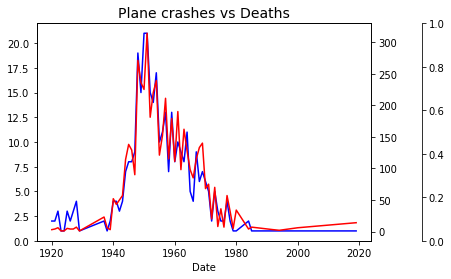

<Figure size 864x576 with 0 Axes>

In [47]:
fig, ax = plt.subplots()
fig = plt.figure(figsize=(12, 8))
ax.set_title('Plane crashes vs Deaths', fontsize=14)
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
fig.subplots_adjust(right=0.7)

df_3.Date.groupby(df_3.Date.dt.year).agg('count').plot(ax=ax, style='b-')
df_3['Fatalities'].groupby(df_3.Date.dt.year).agg('sum').plot(ax=ax, style='r-', secondary_y=True)

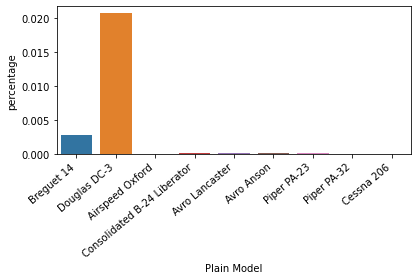

In [62]:
ax = sns.barplot(x = tabla_def.AC_Type, y = tabla_def.percentage)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Plain Model") #y label
plt.tight_layout()
plt.show()

Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Douglas DC-4                                 38
Yakovlev YAK-40                              35
Antonov AN-26                                34
Junkers JU-52/3m                             31
De Havilland DH-4                            27
Douglas DC-6B                                27
Douglas C-47B                                27
Breguet 14                                   22
Douglas DC-6                                 20
Antonov AN-24                                19
Curtiss C-46A                                19
Antonov AN-12                                18
McDonnell Douglas DC-9-32                    18
Curtiss C-46                                 18
Douglas C-47-DL                              18
Fokker F-27 Friendship 600                   17
Junkers F-13                            

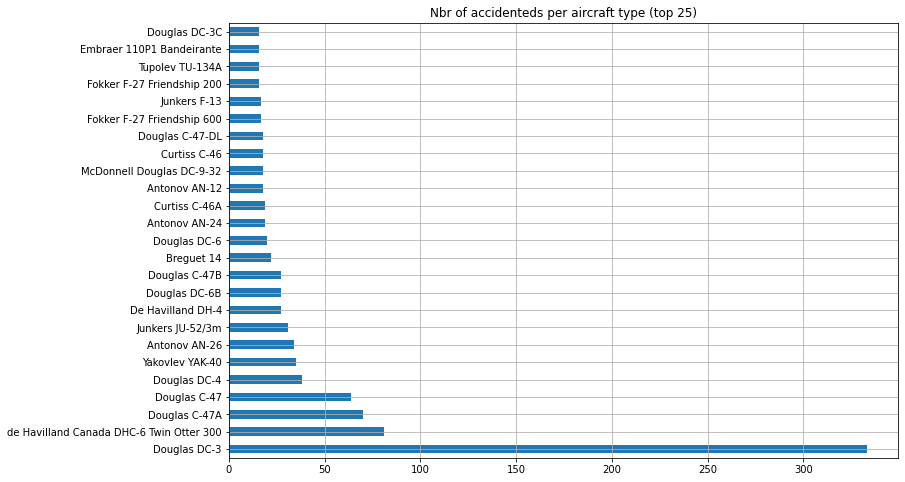

In [63]:
acc_per_ac_type = df['AC_Type'].value_counts().head(25)
acc_per_ac_type.plot(kind='barh', figsize=(12,8), title='Nbr of accidenteds per aircraft type (top 25)', grid=True)
acc_per_ac_type.head(25)